In [13]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
import h5py
%matplotlib inline

In [14]:
X = rand.randn(10000)
print (X)

[-0.41292395 -0.71441464 -0.11778178 ... -1.4585261   1.48573235
  1.09216722]


In [15]:
t = np.linspace(3, 5, num = 10000)
print (t)

[3.         3.00020002 3.00040004 ... 4.99959996 4.99979998 5.        ]


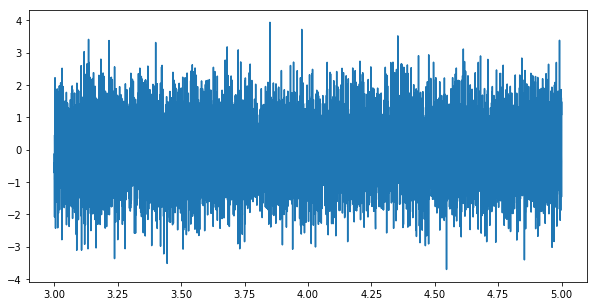

In [16]:
plt.figure(figsize = (10, 5)) 
plt.plot(t, X)

In [17]:
M = np.mean(X)
print (M)

-0.016532589937520152


In [18]:
MM = (1/10000)*np.sum(X)
print (MM)

-0.016532589937520152


In [19]:
D = np.var(X)
print (D)

0.9786012930118401


In [20]:
DD = (1/10000)*np.sum((X-M)**2)
print (DD)

0.9786012930118401


In [33]:
from scipy import stats
skew = stats.skew(X)
kurtosis = stats.kurtosis(X,fisher=False)
print (skew)
print (kurtosis)

-0.0012796867656825026
3.001926766369762


In [34]:
Skewness = (np.mean((X-M)**3))/(np.std(X)**3)
Kurtosis = (np.mean((X-M)**4))/(np.std(X)**4)
print (Skewness)
print (Kurtosis)

-0.001279686765682507
3.0019267663697615


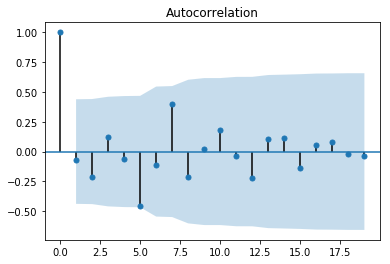

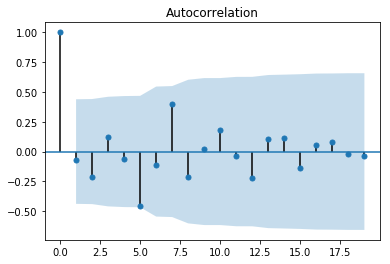

In [13]:
plot_acf(X[0:20])


array([ 1.00000000e+00, -2.55896731e-03,  8.63728302e-03, -1.63715754e-03,
        1.05659013e-02,  1.76198298e-03, -4.20722730e-05, -6.54649652e-03,
       -8.41265014e-03, -1.46721692e-02, -1.69728677e-02,  6.17991737e-04,
       -1.77352884e-02, -1.02290125e-02, -4.37295516e-04,  1.37740427e-02,
       -7.95638990e-03,  6.08109820e-03, -4.63151560e-03, -4.01841462e-03])

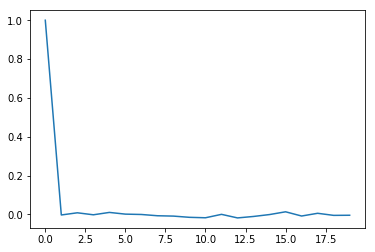

In [28]:
tmp=np.correlate(X, X, mode = 'full')
tmp=tmp/max(tmp)
tmp=tmp[tmp.size//2:]
tmp=tmp[0:20]
plt.plot(tmp)
tmp

[1, 9.999999999999998e-05, 9.999999999999999e-05, -0.0001, 0.0001, 9.999999999999999e-05, 0.0001, 0.0001, 0.0001, 9.999999999999998e-05, 0.0001, -0.0001, 0.0001, 9.999999999999999e-05, 0.00010000000000000002, 0.00010000000000000002, -9.999999999999998e-05, 0.0001, -0.0001, -0.00010000000000000002]


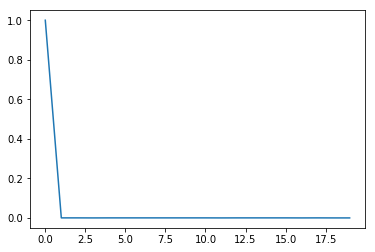

In [32]:
def acor(x,lag):
    N=len(x)
    ac=[1]#np.zeros(lag-1)#ACF(0)=1
    for i in range(0,lag-1):
        acp=((N-lag)*np.sum(x[i]*x[i+lag])-np.sum(x[i])*np.sum(x[i+lag]))/(np.sqrt((N-lag)*np.sum(x[i]**2)-(np.sum(x[i]))**2)*np.sqrt((N-lag)*np.sum(x[i+lag]**2)-(np.sum(x[i+lag]))**2))
        ac.append(acp/len(x))
    return ac
print(acor(X,20))
plt.plot(acor(X,20))

In [42]:
def myfunction(x):
    M = np.mean(x)
    D = np.var(x)
    skew = stats.skew(x)
    kurtosis = stats.kurtosis(x,fisher=False)
    plot_acf(x[0:20])
    return M,D,skew,kurtosis

-0.016532589937520152 0.9786012930118401 -0.0012796867656825026 3.001926766369762


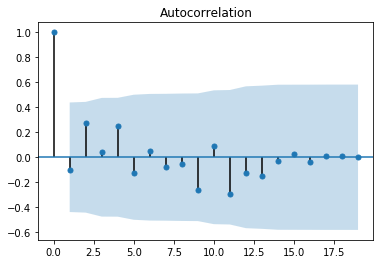

In [43]:
M,D,skew,kurtosis=myfunction(X)
print(M,D,skew,kurtosis)

In [44]:
Xmat = h5py.File('5.mat', 'r')  
Xmat = Xmat.get('z5')  
Xmat = np.array(Xmat)

(0.004332676651000407,
 0.252550764447592,
 array([0.05401147]),
 array([1.7810179]))

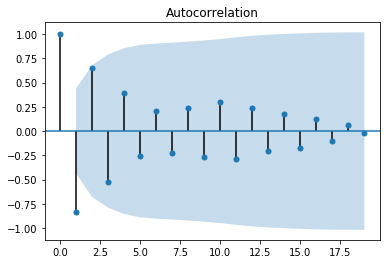

In [45]:
myfunction(Xmat)